In [5]:
import pandas as pd
import seaborn as ans
import numpy as np
import zipfile
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
df=pd.read_csv("E:/myapp/Reviews.csv.zip")

In [7]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.shape

(568454, 10)

In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
#Quick eda

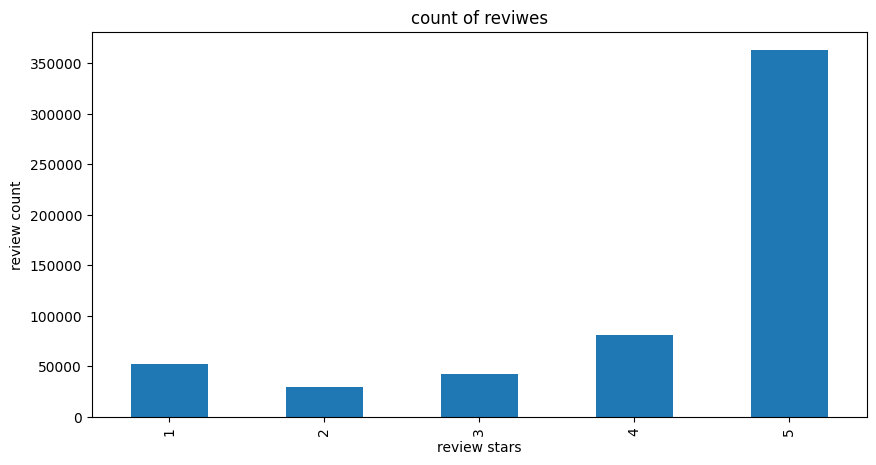

In [11]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='count of reviwes',figsize=(10,5))
ax.set_xlabel('review stars')
ax.set_ylabel('review count')
plt.show()

In [12]:
example=df['Text'][30]
print(example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


In [13]:
tokens = word_tokenize(example)



In [14]:
tokens

['I',
 'have',
 'never',
 'been',
 'a',
 'huge',
 'coffee',
 'fan',
 '.',
 'However',
 ',',
 'my',
 'mother',
 'purchased',
 'this',
 'little',
 'machine',
 'and',
 'talked',
 'me',
 'into',
 'trying',
 'the',
 'Latte',
 'Macciato',
 '.',
 'No',
 'Coffee',
 'Shop',
 'has',
 'a',
 'better',
 'one',
 'and',
 'I',
 'like',
 'most',
 'of',
 'the',
 'other',
 'products',
 ',',
 'too',
 '(',
 'as',
 'a',
 'usually',
 'non-coffee',
 'drinker',
 '!',
 ')',
 '.',
 '<',
 'br',
 '/',
 '>',
 'The',
 'little',
 'Dolche',
 'Guesto',
 'Machine',
 'is',
 'super',
 'easy',
 'to',
 'use',
 'and',
 'prepares',
 'a',
 'really',
 'good',
 'Coffee/Latte/Cappuccino/etc',
 'in',
 'less',
 'than',
 'a',
 'minute',
 '(',
 'if',
 'water',
 'is',
 'heated',
 'up',
 ')',
 '.',
 'I',
 'would',
 'recommend',
 'the',
 'Dolce',
 'Gusto',
 'to',
 'anyone',
 '.',
 'Too',
 'good',
 'for',
 'the',
 'price',
 'and',
 "I'am",
 'getting',
 'one',
 'myself',
 '!',
 ':',
 ')']

In [15]:
from nltk.tag.perceptron import PerceptronTagger

In [16]:
k = nltk.pos_tag(tokens)
k[:10]





[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB')]

In [17]:
ne_tree = nltk.chunk.ne_chunk(k)
print(ne_tree)

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non-coffee/JJ
  drinker/NN
  !/.
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/VBZ
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  Coffee/Latte/Cappuccino/etc/NNP
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/RP
  )/)
  ./.
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/NNP Gusto/NNP)
  to/TO
  anyone/NN
  ./.
  To

In [18]:
#veder sentiment scorer

In [19]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
sia

In [21]:
score=sia.polarity_scores('iam so happy')

In [22]:
print(score)

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}


In [23]:
sia.polarity_scores('bad day today')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [24]:
res={}
for i ,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    break

  0%|          | 0/568454 [00:00<?, ?it/s]

res{}

In [25]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}}

In [26]:
df=pd.DataFrame(res).T

In [27]:
df.head

<bound method NDFrame.head of    compound  neg    neu    pos
1    0.9441  0.0  0.695  0.305>